In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('AirPassengers.csv')
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
data=data.rename(columns={'#Passengers':'Passengers'}) #renaming the column

In [4]:
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
#splitting month and year column
data['year']=pd.DatetimeIndex(data['Month']).year
data['month']=pd.DatetimeIndex(data['Month']).month

In [6]:
data

,Month,Passengers,year,month
0,1949-01,112,1949,1
1,1949-02,118,1949,2
2,1949-03,132,1949,3
3,1949-04,129,1949,4
4,1949-05,121,1949,5
...,...,...,...,...
139,1960-08,606,1960,8
140,1960-09,508,1960,9
141,1960-10,461,1960,10
142,1960-11,390,1960,11


In [7]:
#month are year are splited, so Year and month combination colmn will be deleted
data.drop(['Month'],axis=1,inplace=True)
data

,Passengers,year,month
0,112,1949,1
1,118,1949,2
2,132,1949,3
3,129,1949,4
4,121,1949,5
...,...,...,...
139,606,1960,8
140,508,1960,9
141,461,1960,10
142,390,1960,11


In [8]:
#visualisation
import seaborn as sns

<AxesSubplot:xlabel='year', ylabel='Passengers'>

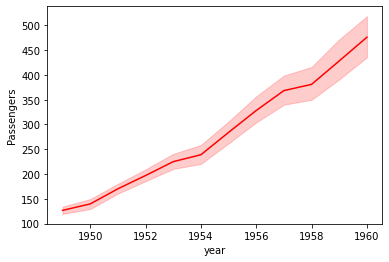

In [9]:
sns.lineplot(x='year',y='Passengers',data=data,color='red')

<AxesSubplot:xlabel='month', ylabel='Passengers'>

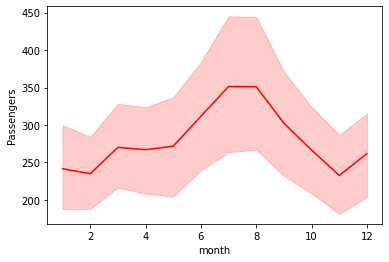

In [10]:
#plot b/w month and passengers
sns.lineplot(x='month',y='Passengers',data=data,color='red')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

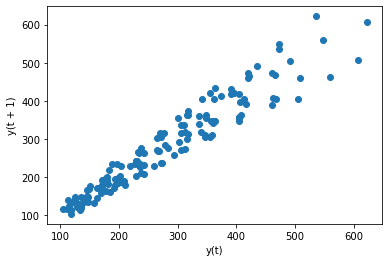

In [11]:
pd.plotting.lag_plot(data['Passengers'])

In [12]:
data.isnull().any()

Passengers    False
year          False
month         False
dtype: bool

In [13]:
train_len=int(0.9*len(data))
test_len=len(data)-train_len
print(train_len)
print(test_len)

129
15


In [14]:
#train,test=        [0:155]               [155:remaining 15 rows data]
train,test=data.iloc[:train_len],data.iloc[train_len:len(data)]

In [15]:
data.shape

(144, 3)

In [16]:
test.shape

(15, 3)

In [17]:
train.shape

(129, 3)

In [18]:
#import robust scaler
from sklearn.preprocessing import RobustScaler
#create object to scaler
rs = RobustScaler()
rs_pas = RobustScaler()

#to which columns apply scaling
t_c = ['year','month']
#normalize year and month column
train.loc[:,t_c] = rs.fit_transform(train[t_c].to_numpy())
test.loc[:,t_c] = rs.transform(test[t_c].to_numpy())

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [19]:
test

,Passengers,year,month
129,407,0.833333,0.666667
130,362,0.833333,0.833333
131,405,0.833333,1.000000
132,417,1.000000,-0.833333
133,391,1.000000,-0.666667
134,419,1.000000,-0.500000
135,461,1.000000,-0.333333
136,472,1.000000,-0.166667
137,535,1.000000,0.000000
138,622,1.000000,0.166667


In [20]:
train

,Passengers,year,month
0,112,-0.833333,-0.833333
1,118,-0.833333,-0.666667
2,132,-0.833333,-0.500000
3,129,-0.833333,-0.333333
4,121,-0.833333,-0.166667
...,...,...,...
124,420,0.833333,-0.166667
125,472,0.833333,0.000000
126,548,0.833333,0.166667
127,559,0.833333,0.333333


In [21]:
#normalise the passenger column for both test and train
train['Passengers'] = rs_pas.fit_transform(train[['Passengers']])
test['Passengers'] = rs_pas.transform(test[['Passengers']])

<ipython-input-21-88bbe496f369>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Passengers'] = rs_pas.fit_transform(train[['Passengers']])
<ipython-input-21-88bbe496f369>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Passengers'] = rs_pas.transform(test[['Passengers']])


In [22]:
train

,Passengers,year,month
0,-0.757576,-0.833333,-0.833333
1,-0.721212,-0.833333,-0.666667
2,-0.636364,-0.833333,-0.500000
3,-0.654545,-0.833333,-0.333333
4,-0.703030,-0.833333,-0.166667
...,...,...,...
124,1.109091,0.833333,-0.166667
125,1.424242,0.833333,0.000000
126,1.884848,0.833333,0.166667
127,1.951515,0.833333,0.333333


In [23]:
test

,Passengers,year,month
129,1.030303,0.833333,0.666667
130,0.757576,0.833333,0.833333
131,1.018182,0.833333,1.000000
132,1.090909,1.000000,-0.833333
133,0.933333,1.000000,-0.666667
134,1.103030,1.000000,-0.500000
135,1.357576,1.000000,-0.333333
136,1.424242,1.000000,-0.166667
137,1.806061,1.000000,0.000000
138,2.333333,1.000000,0.166667


In [24]:
#converting test and train sets into numpy array
train.to_numpy()
test.to_numpy()

array([[ 1.03030303,  0.83333333,  0.66666667],
       [ 0.75757576,  0.83333333,  0.83333333],
       [ 1.01818182,  0.83333333,  1.        ],
       [ 1.09090909,  1.        , -0.83333333],
       [ 0.93333333,  1.        , -0.66666667],
       [ 1.1030303 ,  1.        , -0.5       ],
       [ 1.35757576,  1.        , -0.33333333],
       [ 1.42424242,  1.        , -0.16666667],
       [ 1.80606061,  1.        ,  0.        ],
       [ 2.33333333,  1.        ,  0.16666667],
       [ 2.23636364,  1.        ,  0.33333333],
       [ 1.64242424,  1.        ,  0.5       ],
       [ 1.35757576,  1.        ,  0.66666667],
       [ 0.92727273,  1.        ,  0.83333333],
       [ 1.18181818,  1.        ,  1.        ]])

In [25]:
## convert an array of values into a dataset matrix
def create_dataset(x,y,time_steps=1):
#create an empty lists
    x_train,y_train = [],[]
#time step is the next how many sequence of output
    for i in range(len(x)-time_steps):
        v = x.iloc[i:(i+time_steps)].values
#appending values to a lists
        x_train.append(v)
        y_train.append(y.iloc[i+time_steps])
#returning the list of arrays
    return np.array(x_train),np.array(y_train)

In [26]:
time_steps = 1

x_train,y_train = create_dataset(train,train.Passengers,time_steps)
x_test,y_test = create_dataset(test,test.Passengers,time_steps)

print(x_train,y_train.shape)

[[[-0.75757576 -0.83333333 -0.83333333]]

 [[-0.72121212 -0.83333333 -0.66666667]]

 [[-0.63636364 -0.83333333 -0.5       ]]

 [[-0.65454545 -0.83333333 -0.33333333]]

 [[-0.7030303  -0.83333333 -0.16666667]]

 [[-0.61818182 -0.83333333  0.        ]]

 [[-0.53939394 -0.83333333  0.16666667]]

 [[-0.53939394 -0.83333333  0.33333333]]

 [[-0.61212121 -0.83333333  0.5       ]]

 [[-0.71515152 -0.83333333  0.66666667]]

 [[-0.80606061 -0.83333333  0.83333333]]

 [[-0.72121212 -0.83333333  1.        ]]

 [[-0.73939394 -0.66666667 -0.83333333]]

 [[-0.67272727 -0.66666667 -0.66666667]]

 [[-0.58181818 -0.66666667 -0.5       ]]

 [[-0.61818182 -0.66666667 -0.33333333]]

 [[-0.67878788 -0.66666667 -0.16666667]]

 [[-0.53333333 -0.66666667  0.        ]]

 [[-0.40606061 -0.66666667  0.16666667]]

 [[-0.40606061 -0.66666667  0.33333333]]

 [[-0.47878788 -0.66666667  0.5       ]]

 [[-0.63030303 -0.66666667  0.66666667]]

 [[-0.74545455 -0.66666667  0.83333333]]

 [[-0.58787879 -0.66666667  1.    

In [27]:
import tensorflow

In [28]:
tensorflow.__version__

'2.4.1'

In [29]:
import keras

In [30]:
keras.__version__

'2.4.3'

In [31]:
#import sequential from keras
from keras.models import Sequential
#import different layers
from keras.layers import Dense,LSTM ,Bidirectional,Dropout

In [32]:
#intialise the sequential model
model = Sequential()
model.add(Bidirectional(LSTM(128,input_shape=(1,3))))
#add dropout layer
model.add(Dropout(0.2))
#add dense layer i.e. Output layer
model.add(Dense(units=1))
#trainig the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [33]:
history = model.fit(x_train,y_train,
                   epochs=30,
                   batch_size=16,
                   validation_split=0.2,
                   shuffle=False 
                   )

Epoch 1/30
7/7 [==============================] - 19s 809ms/step - loss: 0.2624 - val_loss: 1.0936
Epoch 2/30
7/7 [==============================] - 0s 10ms/step - loss: 0.2044 - val_loss: 0.9637
Epoch 3/30
7/7 [==============================] - 0s 10ms/step - loss: 0.1674 - val_loss: 0.8365
Epoch 4/30
7/7 [==============================] - 0s 10ms/step - loss: 0.1375 - val_loss: 0.7159
Epoch 5/30
7/7 [==============================] - 0s 12ms/step - loss: 0.1125 - val_loss: 0.6024
Epoch 6/30
7/7 [==============================] - 0s 10ms/step - loss: 0.0880 - val_loss: 0.4973
Epoch 7/30
7/7 [==============================] - 0s 12ms/step - loss: 0.0655 - val_loss: 0.4013
Epoch 8/30
7/7 [==============================] - 0s 13ms/step - loss: 0.0517 - val_loss: 0.3165
Epoch 9/30
7/7 [==============================] - 0s 12ms/step - loss: 0.0376 - val_loss: 0.2443
Epoch 10/30
7/7 [==============================] - 0s 12ms/step - loss: 0.0276 - val_loss: 0.1854
Epoch 11/30
7/7 [==========

In [34]:
x_test

array([[[ 1.03030303,  0.83333333,  0.66666667]],

       [[ 0.75757576,  0.83333333,  0.83333333]],

       [[ 1.01818182,  0.83333333,  1.        ]],

       [[ 1.09090909,  1.        , -0.83333333]],

       [[ 0.93333333,  1.        , -0.66666667]],

       [[ 1.1030303 ,  1.        , -0.5       ]],

       [[ 1.35757576,  1.        , -0.33333333]],

       [[ 1.42424242,  1.        , -0.16666667]],

       [[ 1.80606061,  1.        ,  0.        ]],

       [[ 2.33333333,  1.        ,  0.16666667]],

       [[ 2.23636364,  1.        ,  0.33333333]],

       [[ 1.64242424,  1.        ,  0.5       ]],

       [[ 1.35757576,  1.        ,  0.66666667]],

       [[ 0.92727273,  1.        ,  0.83333333]]])

In [35]:
y_pred = model.predict(x_test)
it = rs_pas.inverse_transform(y_pred)
it

array([[427.42523],
       [396.49567],
       [422.30145],
       [457.30698],
       [439.80743],
       [458.04932],
       [485.46518],
       [491.98126],
       [532.97296],
       [589.459  ],
       [577.26843],
       [510.56342],
       [477.6812 ],
       [429.31863]], dtype=float32)

In [36]:
y_test_inv = rs_pas.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = rs_pas.inverse_transform(y_pred)
y_pred_inv

array([[427.42523],
       [396.49567],
       [422.30145],
       [457.30698],
       [439.80743],
       [458.04932],
       [485.46518],
       [491.98126],
       [532.97296],
       [589.459  ],
       [577.26843],
       [510.56342],
       [477.6812 ],
       [429.31863]], dtype=float32)

In [37]:
model.save('airline4-copy1.h5')

In [38]:
import math
trainScore = model.evaluate(x_train,y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.03 MSE (0.17 RMSE)
Test Score: 0.09 MSE (0.30 RMSE)


In [39]:
y_test_inv = rs_pas.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = rs_pas.inverse_transform(y_pred)

arr1 = np.array(y_test_inv)
arr2 = np.array(y_pred_inv)

actual = pd.DataFrame(data=arr1.flatten(),columns=["actual"])
predicted = pd.DataFrame(data=arr2.flatten(),columns = ["predicted"])

In [40]:
result = pd.concat([actual,predicted],axis=1)
result

,actual,predicted
0,362.0,427.425232
1,405.0,396.495667
2,417.0,422.301453
3,391.0,457.306976
4,419.0,439.807434
5,461.0,458.049316
6,472.0,485.465179
7,535.0,491.981262
8,622.0,532.972961
9,606.0,589.458984
